# Relative scale in convection diffusion equation

$$ \frac{\partial c}{\partial t} + \boldsymbol{u}\cdot \nabla_xc-D\nabla_x^2c=-U_0\nabla\cdot(c\boldsymbol{n})$$
Here, we neglect the diffusion term $D\nabla_x^2c$, so only compare $\boldsymbol{u}\cdot \nabla_xc$ and $-U_0\nabla\cdot(c\boldsymbol{n})$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import typesetting.main as tm
tm.prl('1-column-2-panel')

## 1. $\boldsymbol{u}\cdot \nabla_xc$
Take 08032020/01-(3000-3100) as an example.

### 1.1 One frame distribution and mean

Text(0, 0.5, 'PDF')

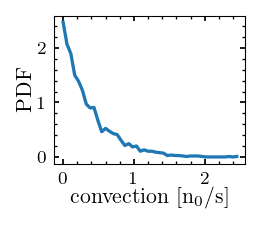

In [49]:
# PDF, frame 3000
conv = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\convection\3000-3001.npy')
hist, bin_edges = np.histogram(abs(0.19*conv), bins='sqrt', density=True)
plt.plot(bin_edges[:-1], hist)
plt.xlabel('convection [n$_0$/s]')
plt.ylabel('PDF')

In [50]:
# mean, frame 3000
abs(0.19*conv).mean()

0.3731900937342173

### 1.2 Add more statistics
Consider 3000-3100 frames.

In [39]:
conv_list = []
for i in range(3000, 3100, 2):
    conv = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\convection\{0:04d}-{1:04d}.npy'.format(i, i+1))
    conv_list.append(conv)
conv_stack = np.stack(conv_list)

Text(0, 0.5, 'PDF')

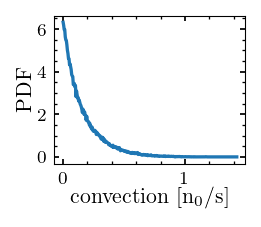

In [40]:
# PDF, 3000-3100
hist, bin_edges = np.histogram(abs(0.19*conv_stack), bins='sqrt', density=True)
plt.plot(bin_edges[:-1], hist)
plt.xlabel('convection [n$_0$/s]')
plt.ylabel('PDF')

In [41]:
# mean, 3000-3100
abs(0.19*conv_stack).mean()

0.16047992088230412

## 2. $-U_0\nabla\cdot(c\boldsymbol{n})$
I think of this quantity the same as $\nabla\cdot(c\boldsymbol{v})$

### 2.1 One frame distribution and mean

Text(0, 0.5, 'PDF')

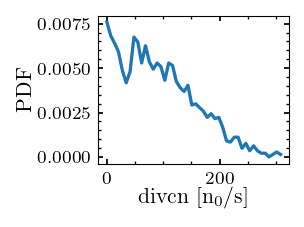

In [55]:
# PDF, frame 3000
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\3000-3001.npy')
hist, bin_edges = np.histogram(abs(divcn), bins='sqrt', density=True)
plt.plot(bin_edges[:-1], hist)
plt.xlabel('divcn [n$_0$/s]')
plt.ylabel('PDF')

In [56]:
# mean, frame 3000
abs(divcn).mean()

94.93405150682291

### 2.2 Add more statistics
Consider frames 3000-3100

In [57]:
divcn_list = []
for i in range(3000, 3100, 2):
    divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(i, i+1))
    divcn_list.append(divcn)
divcn_stack = np.stack(divcn_list)

Text(0, 0.5, 'PDF')

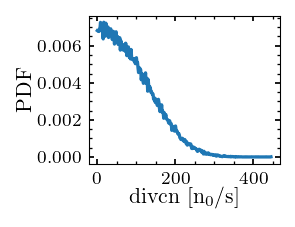

In [58]:
# PDF, 3000-3100
hist, bin_edges = np.histogram(abs(divcn_stack), bins='sqrt', density=True)
plt.plot(bin_edges[:-1], hist)
plt.xlabel('divcn [n$_0$/s]')
plt.ylabel('PDF')

In [59]:
abs(divcn_stack).mean()

87.99850530787621

## 3. $\nabla\cdot\boldsymbol{v}$

### 3.1 One frame distribution and mean

Text(0, 0.5, 'PDF')

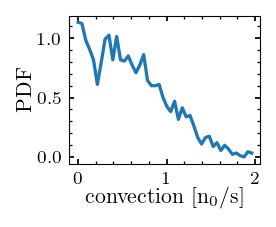

In [53]:
# PDF, frame 3000
divv = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divergence\3000-3001.npy')
hist, bin_edges = np.histogram(abs(divv), bins='sqrt', density=True)
plt.plot(bin_edges[:-1], hist)
plt.xlabel('convection [n$_0$/s]')
plt.ylabel('PDF')

In [54]:
abs(divv).mean()

0.6046773181222691

## 4. Conclusion

Unit: n$_0$/s
$$\boldsymbol{u}\cdot \nabla_xc\sim O(1)$$
$$-U_0\nabla\cdot(c\boldsymbol{n})\sim O(100)$$
$$c\nabla\cdot\boldsymbol{v}\sim O(100)$$

$-U_0\nabla\cdot(c\boldsymbol{n})$ should dominate the concentration change!